In [114]:
include("../src/dependencies.jl");
pyplot()

Plots.PyPlotBackend()

In [37]:
param = ( ϵ  = 1/2,
        	N  = 2^14,
            L  = 10,
            T  = 5,
            dt = 0.001)

(ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)

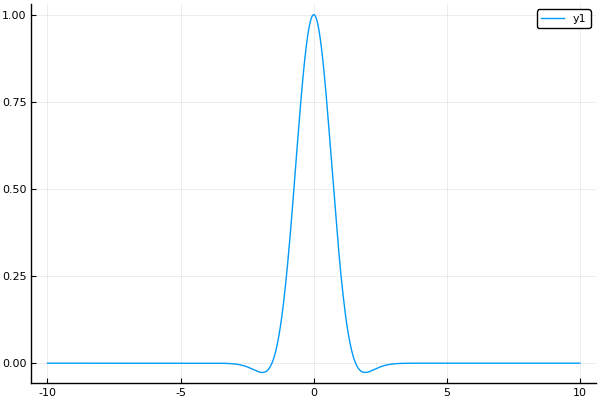

In [88]:
init = HighFreq(param,2,100)
plot(Mesh(param).x,init.h)

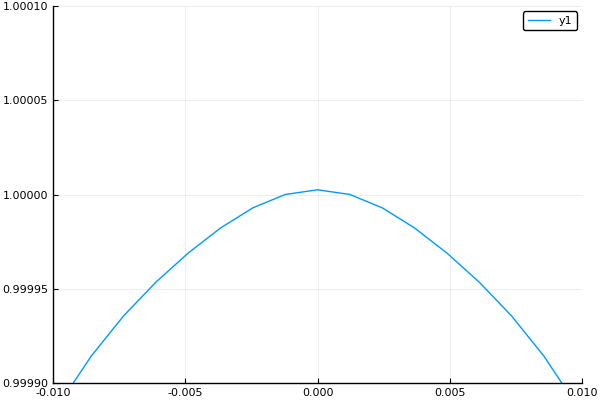

In [92]:
plot(Mesh(param).x,init.h,xlims=(-.01,.01),ylims=(0.9999,1.0001))


In [93]:
model0    = Matsuno_mod_naive(param)
problem0 = Problem(model0, init, param);

model1    = Matsuno_naive(param)
problem1 = Problem(model1, init, param);

model2  = Matsuno(param)
problem2 = Problem(model2, init, param);

problems = [ problem0, problem1, problem2 ];


In [98]:
p = plot(layout=(2,1))

for problem in problems
	print("\nNow solving the model ",problem.model.label,"\n")
   	@time solve!( problem )
   	fig_problem!( p, problem )

end


Now solving the model modified Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00


269.128359 seconds (11.36 M allocations: 151.973 GiB, 16.20% gc time)

Now solving the model Matsuno naive
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00


271.680093 seconds (12.28 M allocations: 166.658 GiB, 17.88% gc time)

Now solving the model Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01


143.748232 seconds (1.76 M allocations: 63.553 GiB, 17.33% gc time)


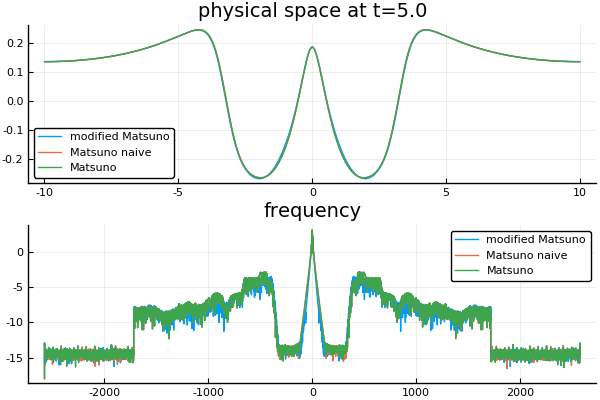

In [108]:
p = plot(layout=(2,1))
for problem in problems
    fig_problem!( p, problem ,5)
end
p

In [109]:
maximum(mapfro(model0,problem1.data.U[1000])[2].-mapfro(model0,problem0.data.U[1000])[2])

0.010807609530859796

In [110]:
maximum(mapfro(model0,problem1.data.U[1000])[2].-mapfro(model0,problem2.data.U[1000])[2])

1.7985612998927536e-14

In [ ]:
p=plot()
for problem in problems
    norm_problem!( p, problem ,2)
end
p